# Stats and Analysis Notebook

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_1samp
import sqlite3
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib.ticker import ScalarFormatter

Read clean data

In [2]:
gross_budget=pd.read_csv('../Data/clean_data/gross_budget.csv',index_col=0)

In [3]:
movie_genre_profit=pd.read_csv('../Data/clean_data/gross_budget_genre.csv',index_col=0)

In [4]:
gross_budget.head()

,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901
2,Shrek Forever After,513900000,165000000,238736787,756244673,591244673,358.330105
3,The Twilight Saga: Eclipse,398000000,68000000,300531751,706102828,638102828,938.386512
4,Iron Man 2,311500000,170000000,312433331,621156389,451156389,265.386111


In [5]:
movie_genre_profit.head()

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Adventure,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Animation,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Comedy,8.3,682218.0,24.445,2010-06-17,June
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Action,8.8,1841066.0,27.920,2010-07-16,July
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Adventure,8.8,1841066.0,27.920,2010-07-16,July


## Analysis and business recommendations

### First bussines recommendation

Since there is a significant difference in mean ROI among genres and if horror and thrillers exhibit the highest mean ROI, it indicates that these genres, on average, have a more favorable return on investment compared to other genres.

Consider allocating resources and focusing marketing efforts on producing and promoting horror and thriller movies. These genres have shown, on average, higher returns on investment, suggesting a potential business opportunity.

In [6]:
movie_genre_profit.head()

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Adventure,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Animation,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Comedy,8.3,682218.0,24.445,2010-06-17,June
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Action,8.8,1841066.0,27.920,2010-07-16,July
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Adventure,8.8,1841066.0,27.920,2010-07-16,July


In [7]:
corr=movie_genre_profit[['production_budget','net_profit' , 'domestic_gross_y','foreign_gross','worldwide_gross']].corr()

In [8]:
corr

,production_budget,net_profit,domestic_gross_y,foreign_gross,worldwide_gross
production_budget,1.000000,0.654033,0.699290,0.760902,0.777736
net_profit,0.654033,1.000000,0.935265,0.873253,0.984173
domestic_gross_y,0.699290,0.935265,1.000000,0.808757,0.940983
foreign_gross,0.760902,0.873253,0.808757,1.000000,0.903887
worldwide_gross,0.777736,0.984173,0.940983,0.903887,1.000000


In [9]:
#group by generes for mean ROI
genres_group_ROI=movie_genre_profit.groupby('genres')['ROI'].mean()
genres_group_ROI.sort_values(ascending=False)

genres
Horror         1266.272146
Mystery        1196.900004
Thriller        722.538868
Sport           370.518995
Documentary     339.749306
Romance         331.405708
Music           308.979671
Sci-Fi          304.973267
Animation       288.559933
Comedy          275.843857
Biography       257.000103
Drama           245.578295
Adventure       237.396481
Fantasy         231.195001
Action          197.524001
Family          181.243727
History         176.870635
Crime           142.333966
Musical         137.381944
Western          84.068855
War              57.951986
Name: ROI, dtype: float64

C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


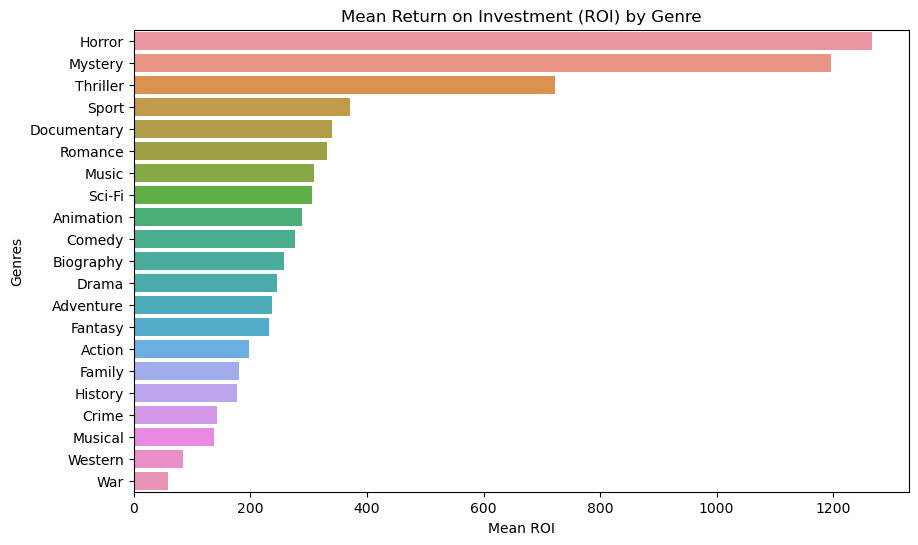

In [10]:
#plotting a simple bar graph to show case the mean ROI accross the genres
genres_group_ROI = genres_group_ROI.sort_values(ascending=False)
plt.figure(figsize=(10, 6),dpi=100)
sns.barplot(x=genres_group_ROI.values, y=genres_group_ROI.index)

plt.title('Mean Return on Investment (ROI) by Genre')
plt.xlabel('Mean ROI')
plt.ylabel('Genres')

plt.show()

#### 1:Hypothesis testing to check whether their is a siginificant difference in mean ROI among genres

- Null hypothesis: There is no significant difference in mean ROI among genres.
- Alternative hypothesis : There is a significant difference in mean ROI among genres.

In [11]:
#used ANOVA for testing
ROI_by_genre = [movie_genre_profit[movie_genre_profit['genres'] == genre]['ROI'] for genre in movie_genre_profit['genres'].unique()]

f_stats, p_value = f_oneway(*ROI_by_genre)
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean ROI among genres.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean ROI among genres.")

4.677511877963311e-14
Reject the null hypothesis. There is a significant difference in mean ROI among genres.


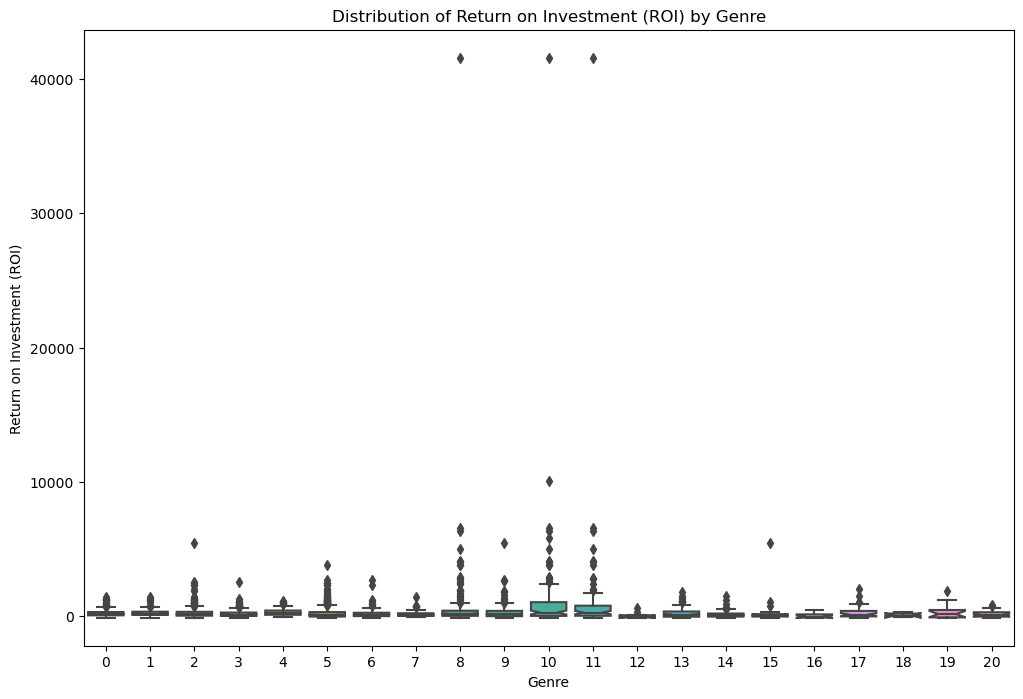

In [12]:
#using box plot showing the distribution of return on investment by genre
plt.figure(figsize=(12, 8))

sns.boxplot(data=ROI_by_genre, notch=True)
plt.title('Distribution of Return on Investment (ROI) by Genre')
plt.xlabel('Genre')
plt.ylabel('Return on Investment (ROI)')
plt.show()

### Second bussines recommendation

Since there is a significant difference in mean net profit among genres and the analysis has identified June and August as the best months for releasing horror movies based on mean net profit, this indicates a statistically supported pattern in profitability.

Consider strategically planning the release of horror movies during August and September. The statistical evidence suggests that, on average, movies in the horror genre tend to generate higher net profits during these months. This can be a valuable insight for optimizing your release schedule and potentially maximizing returns on horror movie investments.

In [13]:
#filtered only horror movie genres
profit_month_horror=movie_genre_profit.loc[movie_genre_profit.genres=='Horror']
profit_month_horror.head()

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
16,Resident Evil: Afterlife,240100000,57500000,60128566,295874190,238374190,414.563809,tt1220634,96.0,Horror,5.9,153270.0,0.667,2010-09-10,September
32,Paranormal Activity 2,92800000,3000000,84752907,177512032,174512032,5817.067733,tt1536044,91.0,Horror,5.7,93122.0,8.163,2010-10-21,October
41,The Wolfman,77800000,150000000,62189884,142634358,-7365642,-4.910428,tt0780653,103.0,Horror,5.8,97873.0,14.030,2010-02-12,February
58,Piranha 3D,58200000,24000000,25003155,83660160,59660160,248.584000,tt0464154,88.0,Horror,5.4,81327.0,11.302,2010-08-20,August
67,The Last Exorcism,26700000,1800000,41034350,70165900,68365900,3798.105556,tt1320244,87.0,Horror,5.6,45815.0,9.350,2010-08-27,August


In [14]:
#provides the average net profit for horror movies grouped by the month of release
profit_month_horror.groupby('release_month')['net_profit'].mean()

release_month
April        3.217739e+07
August       9.723526e+07
December     1.986317e+07
February     5.603848e+07
January      6.783270e+07
July         7.946608e+07
June         9.497014e+07
March        3.782651e+07
May          5.988158e+07
November     2.843931e+07
October      7.625264e+07
September    7.715926e+07
Name: net_profit, dtype: float64

C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


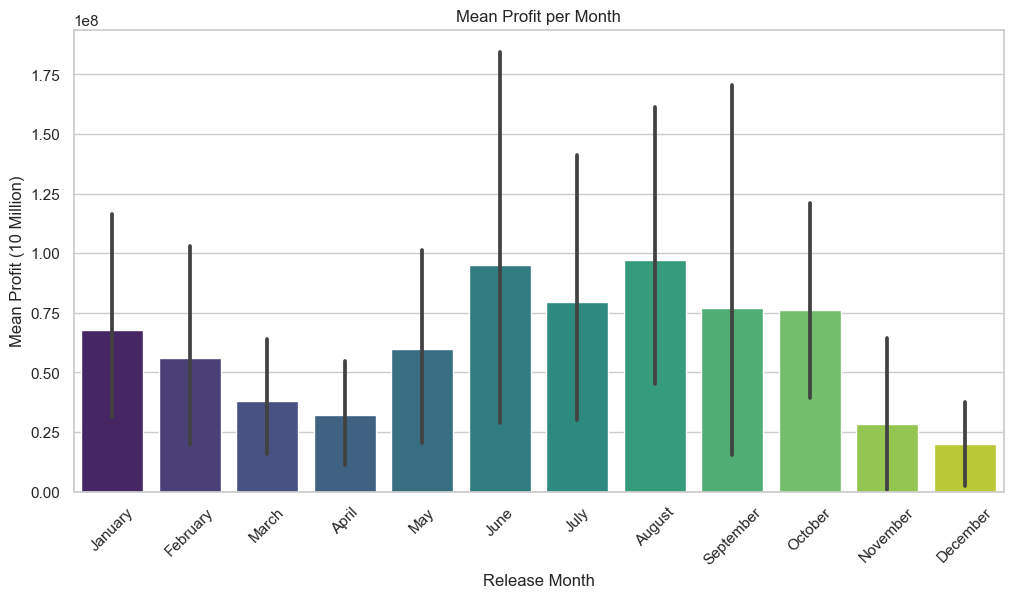

In [15]:
# barplot graph mean profit across each months
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
sns.barplot(x=profit_month_horror.release_month, y=profit_month_horror.net_profit, order=month_order, palette='viridis')
plt.title('Mean Profit per Month')
plt.xlabel('Release Month')
plt.xticks(rotation=45)
plt.ylabel('Mean Profit (10 Million)')
plt.show()

In [16]:

# net_by_month = [profit_month_horror[profit_month_horror['release_month'] == month]['net_profit'] for month in movie_genre_profit['release_month'].unique()]

# f_stats, p_value = f_oneway(*net_by_month)
# print(p_value)
# alpha = 0.05
# if p_value < alpha:
#     print("Reject the null hypothesis. There is a significant difference in mean net profit among genres.")
# else:
#     print("Fail to reject the null hypothesis. There is no significant difference in mean net profit among genres.")

In [17]:
# plt.figure(figsize=(12, 8))
# for month, net_values in zip(profit_month_horror['release_month'].unique(), net_by_month):
#     sns.kdeplot(net_values, label=month, fill=True, common_norm=False)

# plt.title('Distribution of Net Profit by Month')
# plt.xlabel('Net Profit')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

# Linear Regression

Mean Absolute Error: 25002071.71083
Mean Squared Error: 1341775744813061.5
Root Mean Squared Error: 36630257.23105233


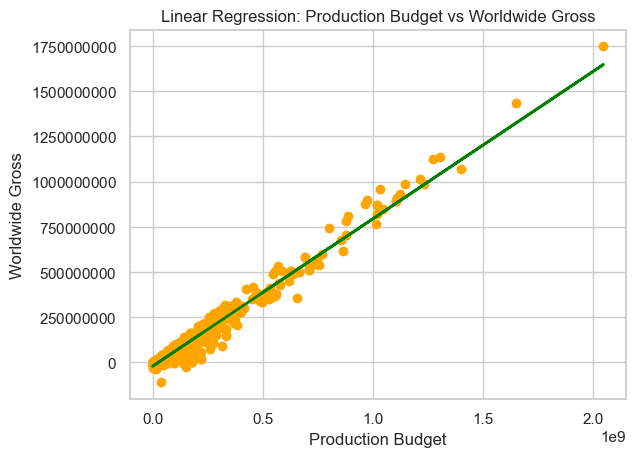

In [19]:
features = movie_genre_profit[['worldwide_gross']]
target = movie_genre_profit['net_profit'] 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(X_test, y_test, color='orange', label='Actual')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Linear Regression Model')


formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Linear Regression: Production Budget vs Worldwide Gross')
plt.show()


### As a Next step 

Move on to action movies, with the optimal release months identified as May and June. 

In [20]:
#filtered only horror movie genres
profit_month_action=movie_genre_profit.loc[movie_genre_profit.genres=='Action']
profit_month_horror.head()

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
16,Resident Evil: Afterlife,240100000,57500000,60128566,295874190,238374190,414.563809,tt1220634,96.0,Horror,5.9,153270.0,0.667,2010-09-10,September
32,Paranormal Activity 2,92800000,3000000,84752907,177512032,174512032,5817.067733,tt1536044,91.0,Horror,5.7,93122.0,8.163,2010-10-21,October
41,The Wolfman,77800000,150000000,62189884,142634358,-7365642,-4.910428,tt0780653,103.0,Horror,5.8,97873.0,14.030,2010-02-12,February
58,Piranha 3D,58200000,24000000,25003155,83660160,59660160,248.584000,tt0464154,88.0,Horror,5.4,81327.0,11.302,2010-08-20,August
67,The Last Exorcism,26700000,1800000,41034350,70165900,68365900,3798.105556,tt1320244,87.0,Horror,5.6,45815.0,9.350,2010-08-27,August


In [21]:
#provides the average net profit for horror movies grouped by the month of release
profit_month_action.groupby('release_month')['net_profit'].mean()

release_month
April        3.015766e+08
August       1.035604e+08
December     2.377115e+08
February     9.570244e+07
January      8.818655e+07
July         2.291997e+08
June         3.038578e+08
March        1.444390e+08
May          3.396517e+08
November     2.408561e+08
October      9.189051e+07
September    9.780116e+07
Name: net_profit, dtype: float64

C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


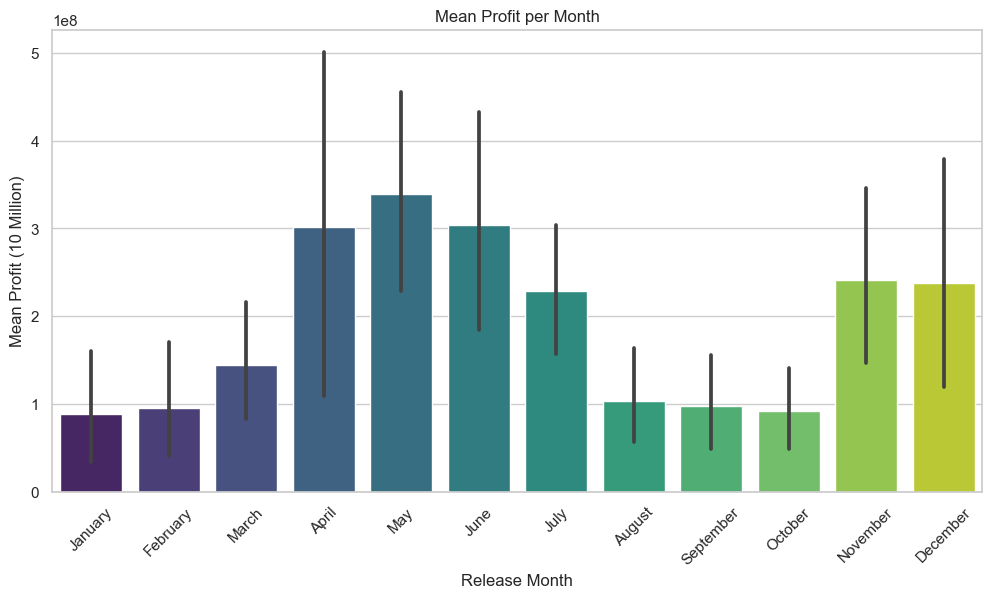

In [22]:
#bar plot to show case the best release time for action movies
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
sns.barplot(x=profit_month_action.release_month, y=profit_month_action.net_profit, order=month_order, palette='viridis')
plt.title('Mean Profit per Month')
plt.xlabel('Release Month')
plt.xticks(rotation=45)
plt.ylabel('Mean Profit (10 Million)')
plt.show()